In [141]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import os
import random

In [142]:
train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
train_dataset.data.shape

Using downloaded and verified file: data/cifar-10-python.tar.gz
Extracting data/cifar-10-python.tar.gz to data/


(50000, 32, 32, 3)

In [143]:
# Define label noise levels
noise_levels = [0,0.1, 0.3, 0.5, 0.8, 0.9]

# Define class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


In [144]:
def symmetric_label_noise(data, labels, epsilon):
    noisy_labels = []
    for label in labels:
        if random.random() < epsilon:
            noisy_label = random.choice([i for i in range(10) if i != label])  # Choose a random label different from the correct one
            noisy_labels.append(noisy_label)
        else:
            noisy_labels.append(label)
            
    noisy_labels = torch.tensor(noisy_labels)
    return data, noisy_labels

def asymmetric_label_noise(data, labels, epsilon):
    noisy_labels = []
    for label in labels:
        if label == 9:  # Check if the label is 'bird'
            if random.random() < epsilon:
                noisy_label = 0  # Flip 'bird' to 'airplane'
            else:
                noisy_label = label
        elif label == 2:  # Check if the label is 'deer'
            if random.random() < epsilon:
                noisy_label = 7  # Flip 'deer' to 'horse'
            else:
                noisy_label = label
        elif label == 3:  # Check if the label is 'cat'
            if random.random() < epsilon:
                noisy_label = 5  # Flip 'cat' to 'dog'
            else:
                noisy_label = label
        elif label == 5:  # Check if the label is 'dog'
            if random.random() < epsilon:
                noisy_label = 3  # Flip 'dog' to 'cat'
            else:
                noisy_label = label
        elif label == 7:  # Check if the label is 'truck'
            if random.random() < epsilon:
                noisy_label = 1  # Flip 'truck' to 'automobile'
            else:
                noisy_label = label
        else:
            noisy_label = label  # For other classes, keep the label as is
        noisy_labels.append(noisy_label)
        
    noisy_labels = torch.tensor(noisy_labels)
    return data, noisy_labels


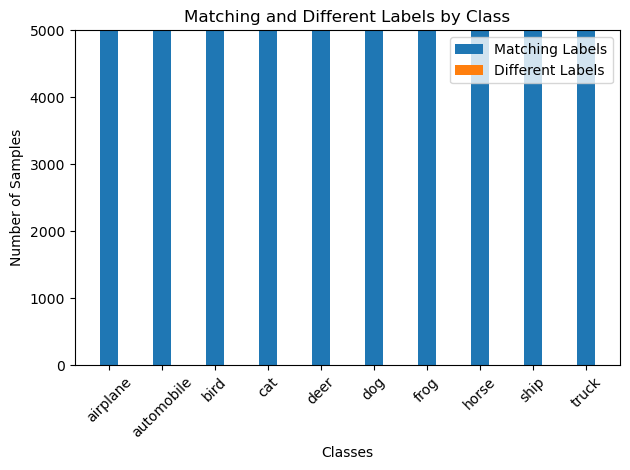

In [146]:

#data, noisy_labels = asymmetric_label_noise(train_dataset.data, train_dataset.targets, 0.1)
ground_truths = train_dataset.targets 
noisy_labels = torch.load("Data/asymmetricNoiseData/0/train.pt")

# Initialize counters for matching and different labels
matching_labels = [0] * 10
different_labels = [0] * 10

# Count matching and different labels for each class
for i in range(len(ground_truths)):
    if ground_truths[i] == noisy_labels[i]:
        matching_labels[ground_truths[i]] += 1
    else:
        different_labels[ground_truths[i]] += 1

# Set up the figure and axis
fig, ax = plt.subplots()

# Create bars for matching and different labels
bar_width = 0.35
index = range(10)
p1 = plt.bar(index, matching_labels, bar_width, label='Matching Labels')
p2 = plt.bar(index, different_labels, bar_width, bottom=matching_labels, label='Different Labels')

# Add labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Matching and Different Labels by Class')
plt.xticks(index, class_names, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [140]:
# Create the folders if they don't exist
symmetric_data_folder = 'Data/SymmetricNoiseData'
asymmetric_data_folder = 'Data/AsymmetricNoiseData'
os.makedirs(symmetric_data_folder, exist_ok=True)
os.makedirs(asymmetric_data_folder, exist_ok=True)

for noise_level in noise_levels:
    # Create noisy labels using asymmetric_label_noise
    data, noisy_labels = asymmetric_label_noise(train_dataset.data, train_dataset.targets, noise_level)
    # Save the noisy datasets
    torch.save(noisy_labels, os.path.join(asymmetric_data_folder, f'{int(noise_level * 100)}/train.pt'))
    torch.save(noisy_labels, os.path.join(asymmetric_data_folder, f'{int(noise_level * 100)}/test.pt'))
    
for noise_level in noise_levels:
    # Create noisy labels using asymmetric_label_noise
    data, noisy_labels = symmetric_label_noise(train_dataset.data, train_dataset.targets, noise_level)
    # Save the noisy datasets
    torch.save(noisy_labels, os.path.join(symmetric_data_folder, f'{int(noise_level * 100)}/train.pt'))
    torch.save(noisy_labels, os.path.join(symmetric_data_folder, f'{int(noise_level * 100)}/test.pt'))
    
torch.save(train_dataset.data, "Data/ImageData/train.pt")
torch.save(test_dataset.data, "Data/ImageData/test.pt")